In [1]:
#importing numpy library
import numpy as np

**Linear Regression**

In [19]:
class Linear_Regression():
  #initiating the parameters (learning rate and number of iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
  def fit(self, X, Y):
    #number of training examples and number of features
    self.m, self.n = X.shape #number of rows and columns
    #initiating the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    #implementing gradient descent for optimization
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)
    #calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db
  def predict(self,X):
    return X.dot(self.w) + self.b


Using Linear Regression model for prediction

In [3]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Preprocessing

In [4]:
#loading data
salary_data=pd.read_csv('/content/salary_data.csv')

In [5]:
#printing the first 5 columns
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
#number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [8]:
#checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature and target

In [9]:
x=salary_data.iloc[:,:-1].values #removing last column
y=salary_data.iloc[:,1].values #taking the salary column

In [10]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training and test data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

Training the model

In [20]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [21]:
model.fit(x_train,y_train)

In [22]:
#printing the parameter values(weights and bias)
print('weight = ', model.w[0])
print('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


y=9514(x)+23697

Predict the salary value for test data

In [23]:
test_data_prediction=model.predict(x_test)

In [24]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values and actual values

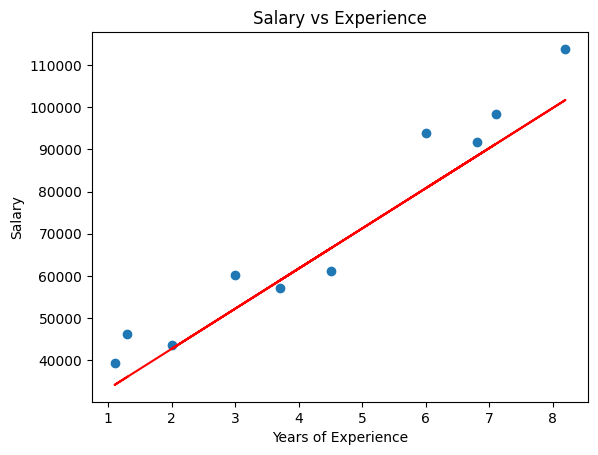

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test,test_data_prediction,color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()